In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
path = "https://compbio.fmph.uniba.sk/vyuka/pridav/data/nhanes-weight.xls"
data = pd.ExcelFile(path).parse('Sheet1')
data["Age"] = data["Age"]/12
data = data.dropna()

data

Gender        Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  \
0          0  20.083333    64.7     163        34.2        36.2        29.0   
1          0  20.083333    54.0     153        37.2        34.0        26.1   
2          1  20.083333    61.4     165        37.7        35.0        31.4   
3          0  20.083333    74.0     171        37.9        36.2        29.8   
4          0  20.083333    63.6     159        38.1        34.0        29.2   
...      ...        ...     ...     ...         ...         ...         ...   
4974       1  79.833333    89.5     184        43.0        42.8        32.2   
4975       0  79.916667    78.6     151        35.6        34.2        33.5   
4976       1  79.916667    86.5     175        38.6        41.5        32.8   
4977       0  79.916667    58.0     163        40.2        37.5        26.2   
4978       1  79.916667    76.2     168        40.8        39.5        29.8   

      Waist  
0      89.6  
1      85.5  
2      70.1  
3      91.1  
4      74.3  
...     ...  
4974  112.8  
4975  114.9  
4976  100.2  
4977   82.8  
4978  103.5  

[4978 rows x 8 columns]

In [3]:
Y = data["Gender"]

X = data.copy(deep=True)
X.drop(labels="Gender",axis=1,inplace=True)

# Trenovacia a validacna
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
X_train

Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  Waist
281   23.416667    60.7     172        43.0        37.0        28.0   80.8
3382  58.666667    85.7     175        41.0        38.9        32.6   95.1
3112  55.083333    59.8     160        34.5        33.3        25.7   88.2
559   26.916667    54.6     160        37.9        35.4        25.7   79.0
2022  43.500000    79.9     171        39.6        38.6        33.7   95.5
...         ...     ...     ...         ...         ...         ...    ...
2487  48.583333    59.3     180        42.4        40.0        28.3   74.0
4571  72.916667   114.6     176        38.0        42.4        40.0  121.6
148   21.833333    88.8     188        43.0        42.0        33.8   93.0
2976  53.500000    46.1     151        32.9        34.0        25.6   66.2
1285  35.416667    87.0     155        33.1        35.4        36.4  110.8

[3982 rows x 7 columns]

In [4]:
# Rozhodovaci strom
strom = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
strom.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

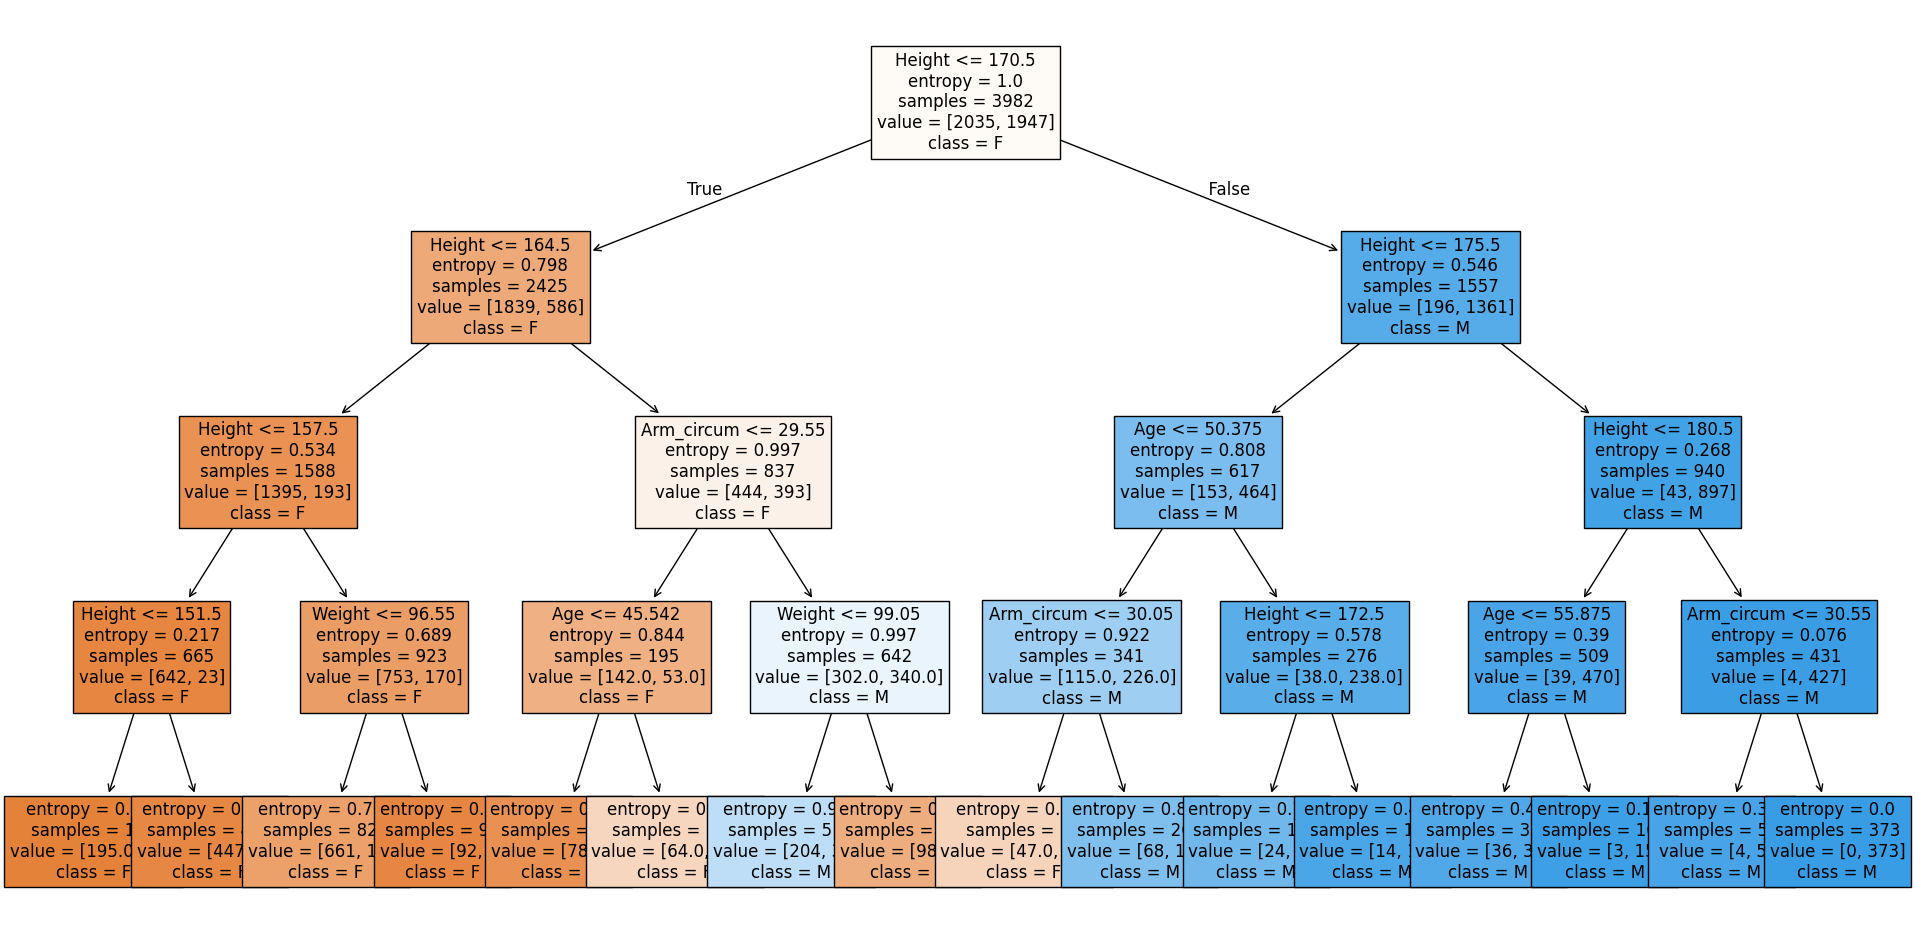

In [5]:
# Vykreslenie
plt.figure(figsize=(24,12))
tree.plot_tree(strom, feature_names=X.columns, filled=True, class_names=['F', 'M'], fontsize=12)
plt.show()

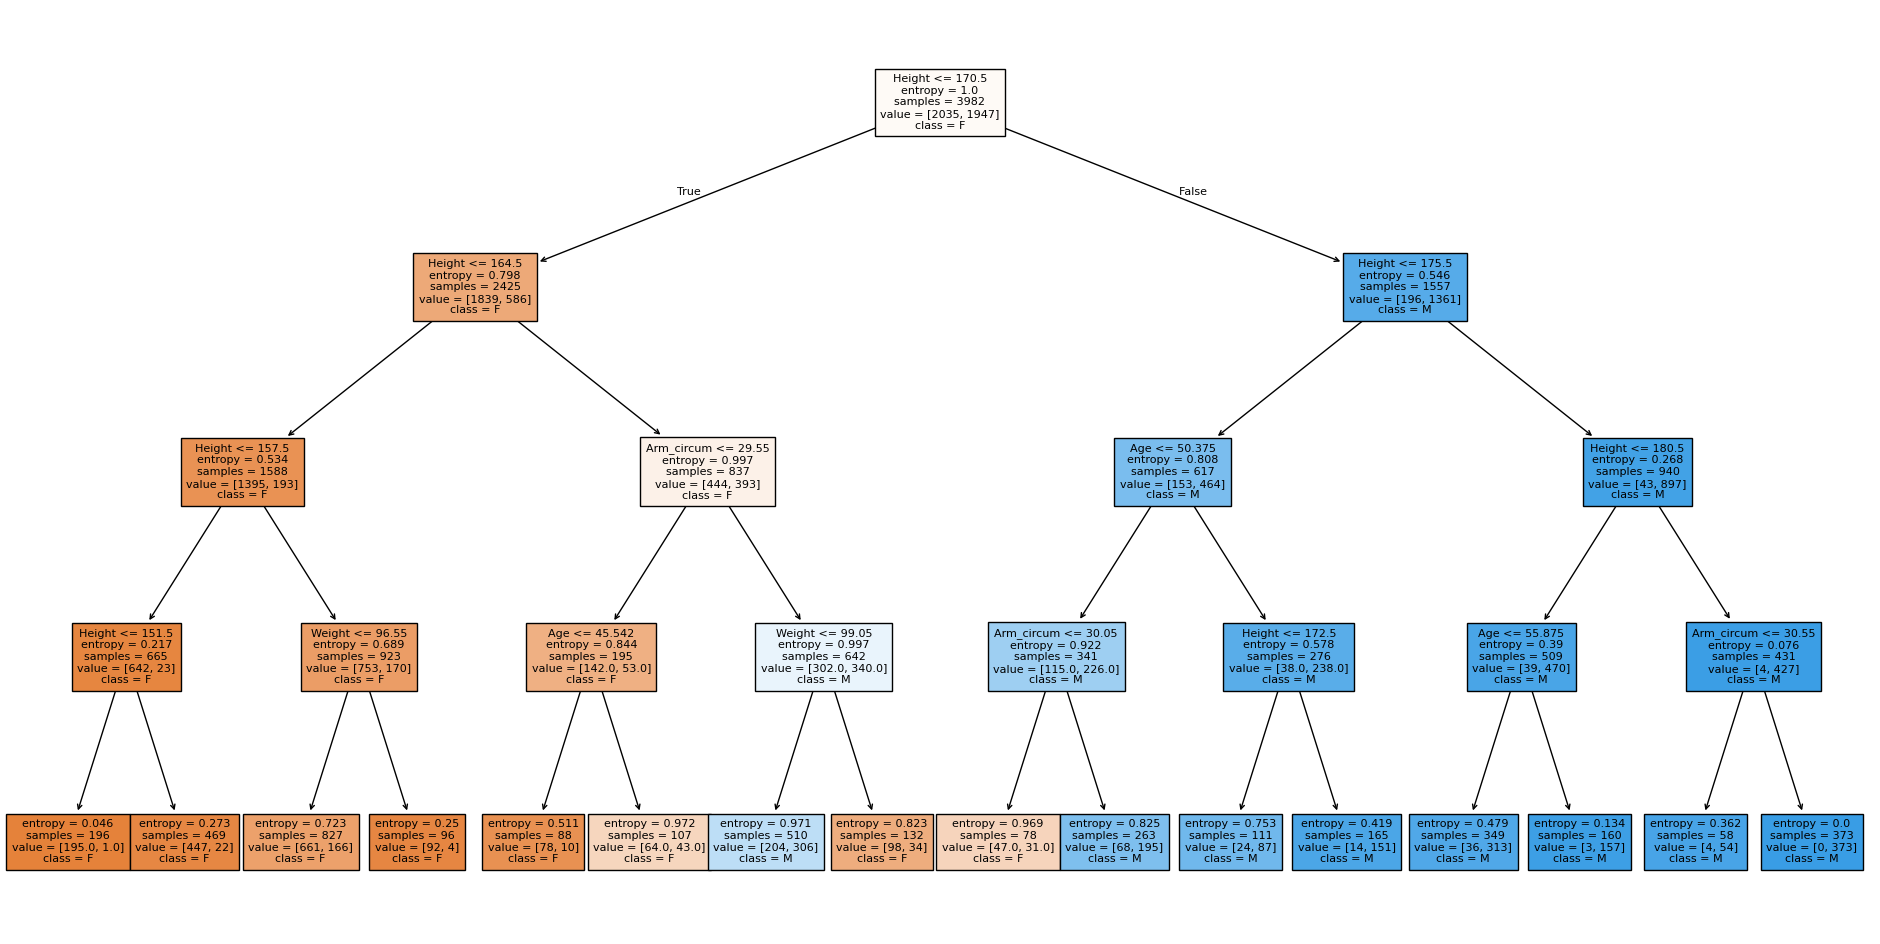

In [6]:
# Zoom out
plt.figure(figsize=(24,12))
tree.plot_tree(strom, feature_names=X.columns, filled=True, class_names=['F', 'M'], fontsize=8)
plt.show()

accuracy: 0.8182730923694779


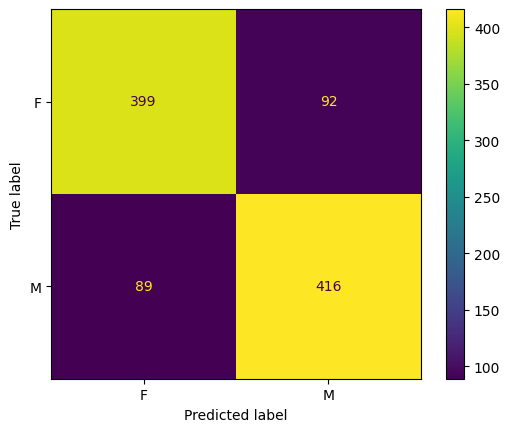

In [7]:
# Kvalita predikcie
y_pred = strom.predict(X_val)
accuracy = accuracy_score(y_val, y_pred) # pocet spravnych predikcii / pocet predikcii
conf_matrix = confusion_matrix(y_val, y_pred)

print("accuracy:", accuracy)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["F", "M"])
cm_display.plot()

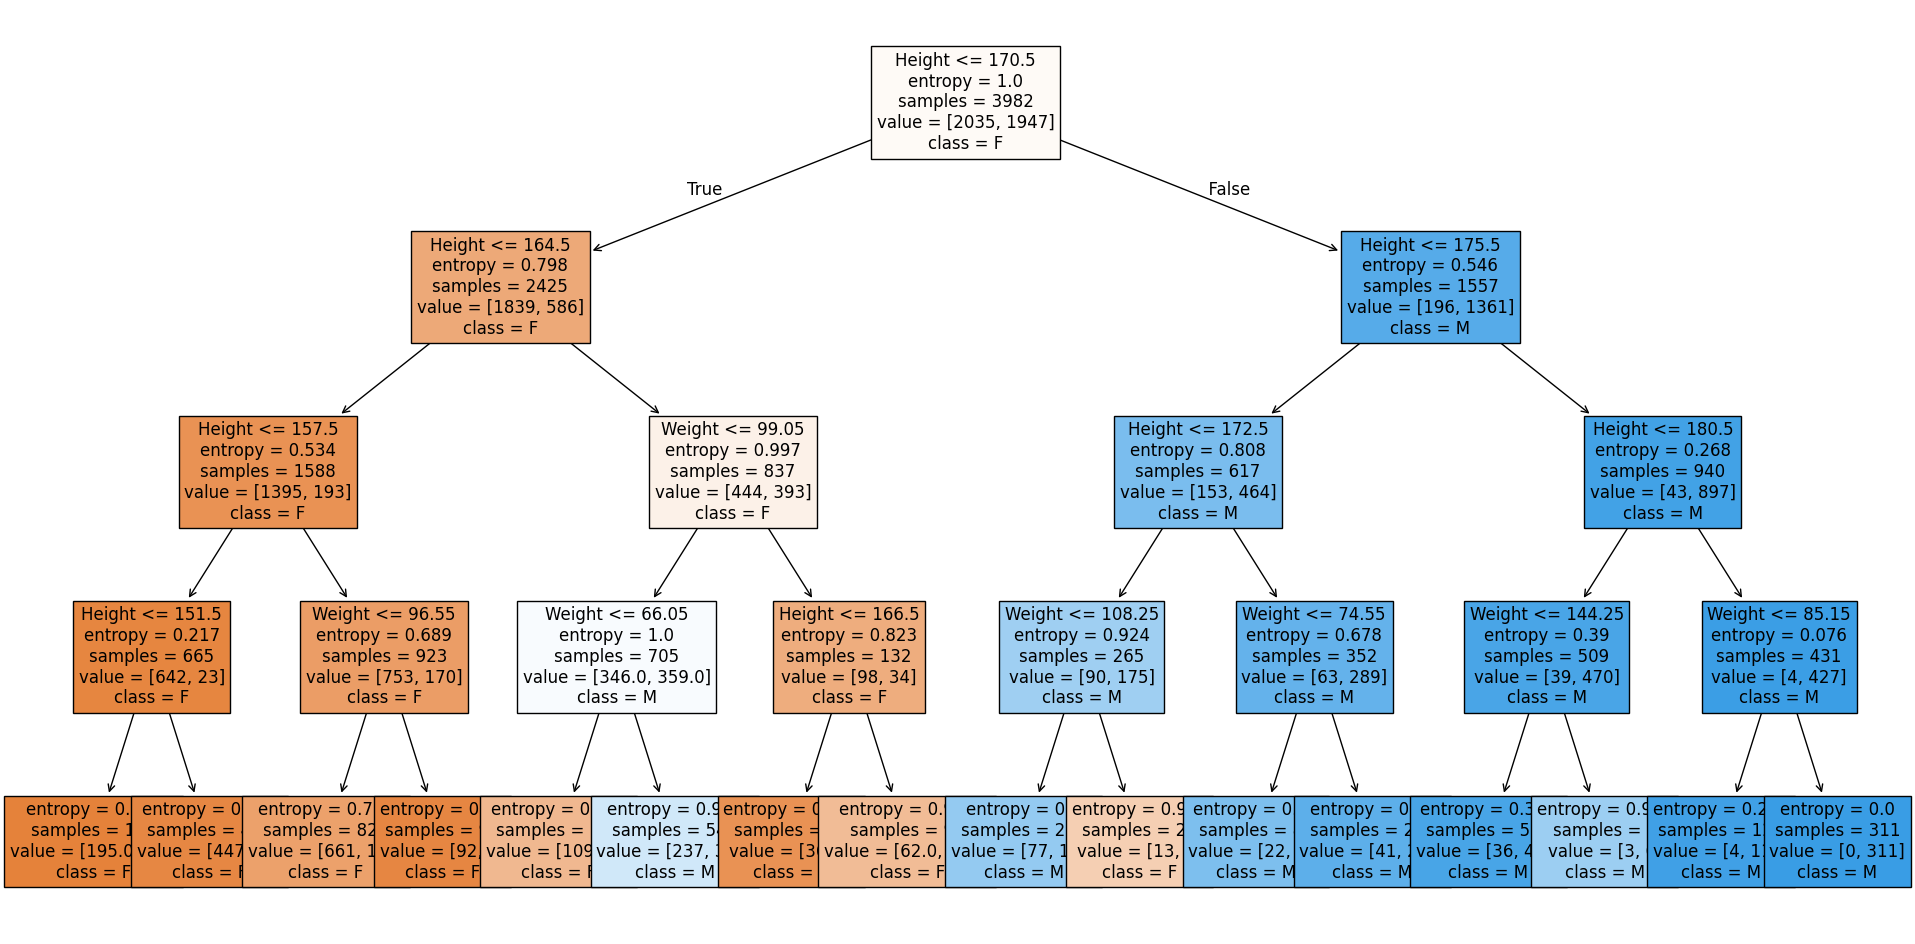

In [8]:
# Strom pre Weight, Height
X2_train = X_train[["Weight", "Height"]]
strom2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
strom2.fit(X2_train, y_train)

# Vykreslenie
plt.figure(figsize=(24,12))
tree.plot_tree(strom2, feature_names=X2_train.columns, filled=True, class_names=['F', 'M'], fontsize=12)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Height')

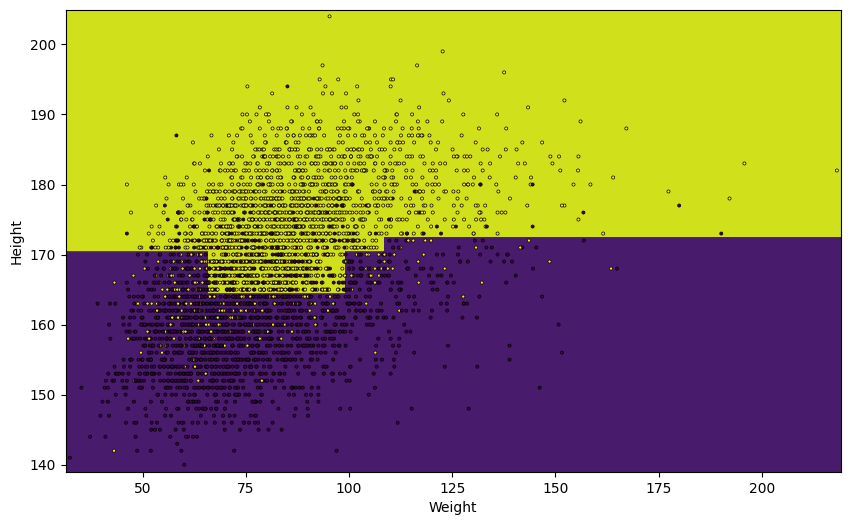

In [9]:
# Rozhodovacia hranica pre 2D prediktory
x_min, x_max = X_train["Weight"].min() - 1, X_train["Weight"].max() + 1
y_min, y_max = X_train["Height"].min() - 1, X_train["Height"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = strom2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)

plt.scatter(X_train["Weight"], X_train["Height"], c=y_train,
            edgecolor='k', linewidths=0.5, s=5, marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')
# vertikalne a horizontalne! (nevyhnutne musia take byt)